# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

Populating the interactive namespace from numpy and matplotlib


<h3>Answer-1</h3>

<p>Let's explore the distribution of the sample by plotting histrogram and kde plots.</p>

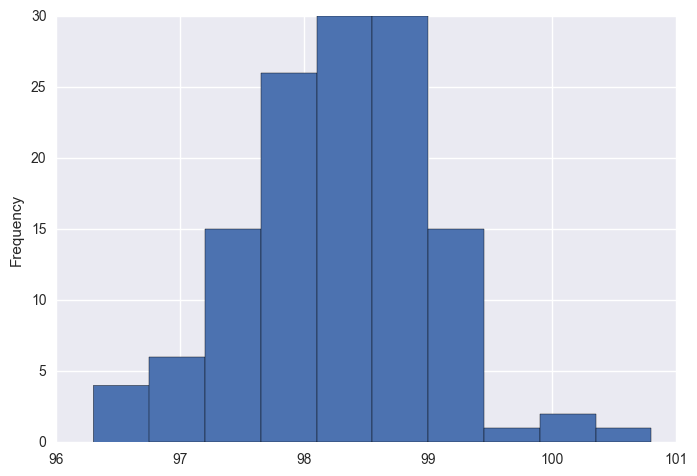

In [2]:
#sns.distplot(df.temperature);
df.temperature.plot(kind='hist')

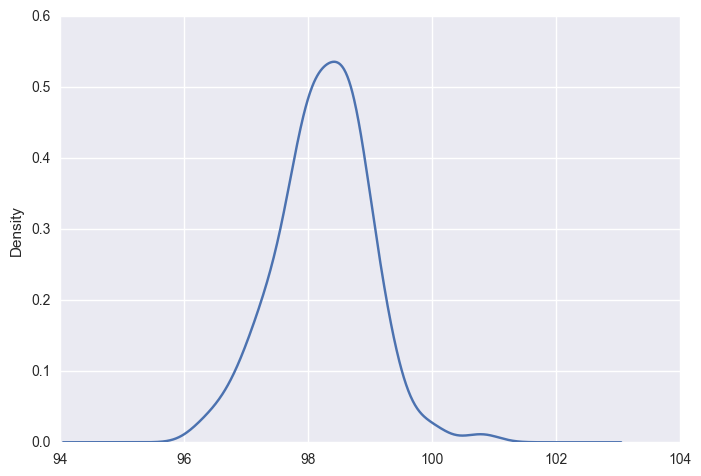

In [3]:
df.temperature.plot(kind='kde')

<p>Also, look at the the properties like <b>mean, variance, skew and kurtosis</b> of the sample. </p>

In [4]:
n, (smin, smax), sm, sv, ss, sk = stats.describe(df.temperature)
sstr = 'mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print (sstr %(sm, sv, ss, sk))

mean = 98.2492, variance = 0.5376, skew = -0.0044, kurtosis = 0.7050


The <b>plots</b> and <b>-0.0044</b> skew value suggest that the sample seems to be a normal distribution. 

<h3>Answer-2</h3>

In [5]:
print ("Number of samples: %d" % len(df.temperature))

df.head(10)

Number of samples: 130


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


<ul>
<li> The sample size 130 (which is > 30) seems to be large enough. </li>
<li> For the whole population, the temperature recordings can be considered as indedpendent. However, they can be classified based on gender as well.</li>
</ul>

<h3>Answer-3</h3>

<p><b> Is the true population mean really 98.6 degrees F?</b>
<ol>
<li>Population mean is given. To see if the given sample is inline with population mean, one-sample test will be used.</li>
<li> Since poluation std deviation or variance is not given, t-test will be used for this purpose.</li>
</ol>
</p>

Take a null hypothesis to determine that the given sample is matching to the population mean 98.6 Degrees F. 
The null hypothesis <b><i>(H0</i>)</b> assumes that the difference between the true mean (μ) and the comparison value (m0) is equal to zero.

In [6]:
m = 98.6
t_static, p_value = stats.ttest_1samp(df.temperature, m)
print ('t-statistic = %6.3f pvalue = %6.4f' %  (t_static, p_value))

t-statistic = -5.455 pvalue = 0.0000


In [7]:
# calculate them individually
n = len(df.temperature)
tt = (sm - m)/np.sqrt(sv/float(n))
pval = stats.t.sf(np.abs(tt), n-1)*2

<p>With <b>|t-static| 5.455</b> (which is greater than 1.96), the obervations differ from population mean suggested in 1868.  

<h3>Answer-4</h3>

<p> Workout standard error and confidence interval for the sample. </p>

In [8]:
se = np.sqrt(sv/float(n))
ci = (sm - (1.96 * se), sm + (1.96 * se))
se, ci

(0.064304416837891024, (98.123194112228489, 98.375267426233009))

If we accept the sample data to be true mean temperature for human body, with **98.25 mean** and **0.064 se**, **any temperature < 98.12 OR temperature > 98.375 degree F** could be considered as abnormal!  

<h3>Answer-5</h3>

In [9]:
df_male = df[df.gender == 'M']
n_male, (smin_male, smax_male), sm_male, sv_male, ss_male, sk_male = stats.describe(df_male.temperature)
sstr = 'Male: mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print (sstr %(sm_male, sv_male, ss_male, sk_male))

Male: mean = 98.1046, variance = 0.4883, skew = -0.2084, kurtosis = -0.4342


In [10]:
df_female = df[df.gender == 'F']
n_female, (smin_female, smax_female), sm_female, sv_female, ss_female, sk_female = stats.describe(df_female.temperature)
sstr = 'Female: mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print (sstr %(sm_female, sv_female, ss_female, sk_female))

Female: mean = 98.3938, variance = 0.5528, skew = 0.0959, kurtosis = 1.4676


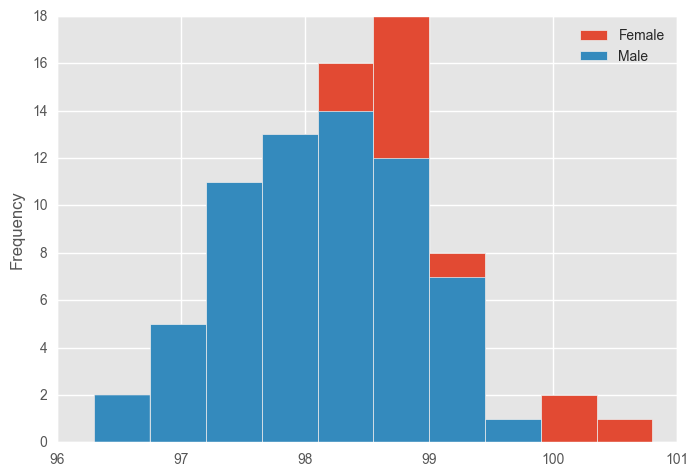

In [11]:
matplotlib.style.use('ggplot')
df_combined = pd.DataFrame({'Male': df_male.temperature, 'Female' : df_female.temperature})
df_combined.plot(kind='hist')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


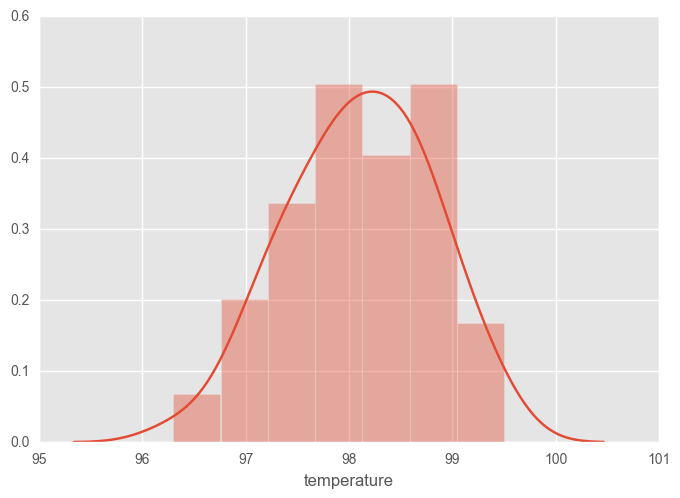

In [12]:
sns.distplot(df_male.temperature)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


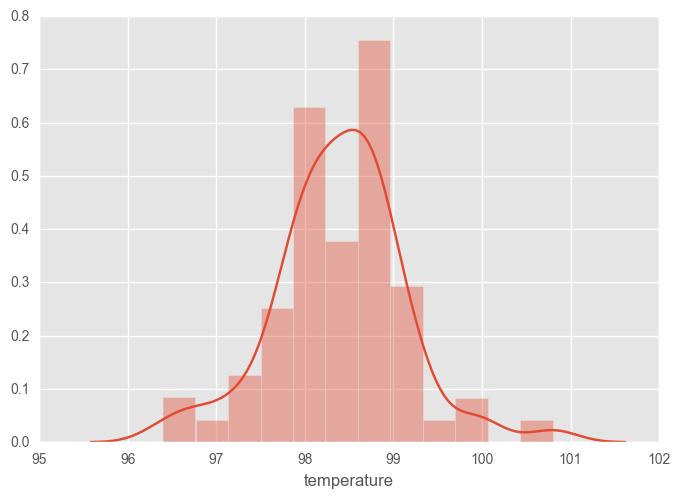

In [13]:
sns.distplot(df_female.temperature)

In [14]:
stats.ttest_ind(df_male.temperature, df_female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [15]:
print ("Difference in female and male temeprature means: %f" % (sm_female - sm_male))

Difference in female and male temeprature means: 0.289231


<p>With <b>|t-static| 2.28</b> (which is greater than 1.96), there is a significant differences in male and feamale obervations. Female seems to be hotter by **0.29 Degree F**.